# Principal Component Analysis with Cancer Data

In [206]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [207]:
import warnings
warnings.filterwarnings("default")

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [208]:
bc=pd.read_csv("breast-cancer-wisconsin-data.csv")

In [209]:
bc.head(10)

ID  ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0  1000025               5          1           1                  1   
1  1002945               5          4           4                  5   
2  1015425               3          1           1                  1   
3  1016277               6          8           8                  1   
4  1017023               4          1           1                  3   
5  1017122               8         10          10                  8   
6  1018099               1          1           1                  1   
7  1018561               2          1           2                  1   
8  1033078               2          1           1                  1   
9  1033078               4          2           1                  1   

   Single Epithelial Cell Size Bare Nuclei  Normal Nucleoli  Bland Chromatin  \
0                            2           1                3                1   
1                            7          10                3                2   
2                            2           2                3                1   
3                            3           4                3                7   
4                            2           1                3                1   
5                            7          10                9                7   
6                            2          10                3                1   
7                            2           1                3                1   
8                            2           1                1                1   
9                            2           1                2                1   

   Mitoses  Class  
0        1      2  
1        1      2  
2        1      2  
3        1      2  
4        1      2  
5        1      4  
6        1      2  
7        1      2  
8        5      2  
9        1      2

In [210]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [211]:
bc1=bc.copy()

In [212]:
bc1.drop('ID',axis =1, inplace =True)

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [213]:
bc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [214]:
bc1.shape

(699, 10)

In [215]:
bc1.describe().T

count      mean       std  min  25%  50%  75%  \
ClumpThickness               699.0  4.417740  2.815741  1.0  2.0  4.0  6.0   
Cell Size                    699.0  3.134478  3.051459  1.0  1.0  1.0  5.0   
Cell Shape                   699.0  3.207439  2.971913  1.0  1.0  1.0  5.0   
Marginal Adhesion            699.0  2.806867  2.855379  1.0  1.0  1.0  4.0   
Single Epithelial Cell Size  699.0  3.216023  2.214300  1.0  2.0  2.0  4.0   
Normal Nucleoli              699.0  3.437768  2.438364  1.0  2.0  3.0  5.0   
Bland Chromatin              699.0  2.866953  3.053634  1.0  1.0  1.0  4.0   
Mitoses                      699.0  1.589413  1.715078  1.0  1.0  1.0  1.0   
Class                        699.0  2.689557  0.951273  2.0  2.0  2.0  4.0   

                              max  
ClumpThickness               10.0  
Cell Size                    10.0  
Cell Shape                   10.0  
Marginal Adhesion            10.0  
Single Epithelial Cell Size  10.0  
Normal Nucleoli              10.0  
Bland Chromatin              10.0  
Mitoses                      10.0  
Class                         4.0

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [216]:
bc1[bc1['Bare Nuclei']=="?"]

ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
23                8          4           5                  1   
40                6          6           6                  9   
139               1          1           1                  1   
145               1          1           3                  1   
158               1          1           2                  1   
164               5          1           1                  1   
235               3          1           4                  1   
249               3          1           1                  1   
275               3          1           3                  1   
292               8          8           8                  1   
294               1          1           1                  1   
297               5          4           3                  1   
315               4          6           5                  6   
321               3          1           1                  1   
411               1          1           1                  1   
617               1          1           1                  1   

     Single Epithelial Cell Size Bare Nuclei  Normal Nucleoli  \
23                             2           ?                7   
40                             6           ?                7   
139                            1           ?                2   
145                            2           ?                2   
158                            3           ?                1   
164                            2           ?                3   
235                            2           ?                3   
249                            2           ?                3   
275                            2           ?                2   
292                            2           ?                6   
294                            2           ?                2   
297                            2           ?                2   
315                            7           ?                4   
321                            2           ?                3   
411                            1           ?                2   
617                            1           ?                1   

     Bland Chromatin  Mitoses  Class  
23                 3        1      4  
40                 8        1      2  
139                1        1      2  
145                1        1      2  
158                1        1      2  
164                1        1      2  
235                1        1      2  
249                1        1      2  
275                1        1      2  
292               10        1      4  
294                1        1      2  
297                3        1      2  
315                9        1      2  
321                1        1      2  
411                1        1      2  
617                1        1      2

In [217]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [218]:
bc1.shape

(699, 10)

In [219]:
## drop duplicates

In [220]:
bc1.drop_duplicates(inplace=True)

In [221]:
bc1.shape

(463, 10)

In [222]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [223]:
bc1.isnull().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [224]:
temp = pd.DataFrame(bc1['Bare Nuclei'].str.isdigit())  

temp[temp['Bare Nuclei'] == False]   # from temp take only those rows where hp has false


Bare Nuclei
23         False
40         False
139        False
145        False
158        False
164        False
235        False
249        False
275        False
292        False
294        False
297        False
315        False
617        False

In [225]:
# On inspecting records , we find "?" in the columns. Replace them with "nan"
#Replace them with nan and remove the records from the data frame that have "nan"

bc1 = bc1.replace('?', np.nan)
bc1 = bc1.apply(lambda x: x.fillna(x.median()),axis=0)


# converting the column from object / string type to float
bc1['Bare Nuclei'] = bc1['Bare Nuclei'].astype('float64')  

 

In [226]:
bc1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 463 non-null int64
Cell Size                      463 non-null int64
Cell Shape                     463 non-null int64
Marginal Adhesion              463 non-null int64
Single Epithelial Cell Size    463 non-null int64
Bare Nuclei                    463 non-null float64
Normal Nucleoli                463 non-null int64
Bland Chromatin                463 non-null int64
Mitoses                        463 non-null int64
Class                          463 non-null int64
dtypes: float64(1), int64(9)
memory usage: 39.8 KB


In [227]:
bc1[bc1['Bare Nuclei']=='Nan']

C:\Users\maheshs\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Empty DataFrame
Columns: [ClumpThickness, Cell Size, Cell Shape, Marginal Adhesion, Single Epithelial Cell Size, Bare Nuclei, Normal Nucleoli, Bland Chromatin, Mitoses, Class]
Index: []

In [228]:
bc1['Bare Nuclei'] = bc1['Bare Nuclei'].astype('int64') 

In [229]:
bc1.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [230]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [231]:
# Check for correlation of variable

In [232]:
bc1.describe().T

count      mean       std  min  25%  50%   75%  \
ClumpThickness               463.0  5.323974  2.873752  1.0  3.0  5.0   8.0   
Cell Size                    463.0  4.174946  3.239645  1.0  1.0  3.0   7.0   
Cell Shape                   463.0  4.239741  3.121767  1.0  1.0  3.0   7.0   
Marginal Adhesion            463.0  3.691145  3.152280  1.0  1.0  2.0   6.0   
Single Epithelial Cell Size  463.0  3.840173  2.446914  1.0  2.0  3.0   5.0   
Bare Nuclei                  463.0  4.751620  3.833786  1.0  1.0  3.0  10.0   
Normal Nucleoli              463.0  4.170626  2.639002  1.0  2.0  3.0   7.0   
Bland Chromatin              463.0  3.803456  3.385452  1.0  1.0  2.0   7.0   
Mitoses                      463.0  1.885529  2.043326  1.0  1.0  1.0   2.0   
Class                        463.0  3.028078  1.000687  2.0  2.0  4.0   4.0   

                              max  
ClumpThickness               10.0  
Cell Size                    10.0  
Cell Shape                   10.0  
Marginal Adhesion            10.0  
Single Epithelial Cell Size  10.0  
Bare Nuclei                  10.0  
Normal Nucleoli              10.0  
Bland Chromatin              10.0  
Mitoses                      10.0  
Class                         4.0

In [233]:
bc1.corr()

ClumpThickness  Cell Size  Cell Shape  \
ClumpThickness                     1.000000   0.578156    0.588956   
Cell Size                          0.578156   1.000000    0.877404   
Cell Shape                         0.588956   0.877404    1.000000   
Marginal Adhesion                  0.383573   0.640096    0.612415   
Single Epithelial Cell Size        0.432165   0.689982    0.649388   
Bare Nuclei                        0.507318   0.588370    0.615732   
Normal Nucleoli                    0.496158   0.712986    0.687331   
Bland Chromatin                    0.450853   0.657170    0.654724   
Mitoses                            0.296797   0.403911    0.381645   
Class                              0.675748   0.757623    0.757932   

                             Marginal Adhesion  Single Epithelial Cell Size  \
ClumpThickness                        0.383573                     0.432165   
Cell Size                             0.640096                     0.689982   
Cell Shape                            0.612415                     0.649388   
Marginal Adhesion                     1.000000                     0.528163   
Single Epithelial Cell Size           0.528163                     1.000000   
Bare Nuclei                           0.588980                     0.480300   
Normal Nucleoli                       0.611294                     0.554625   
Bland Chromatin                       0.514134                     0.558757   
Mitoses                               0.358434                     0.434875   
Class                                 0.622371                     0.604709   

                             Bare Nuclei  Normal Nucleoli  Bland Chromatin  \
ClumpThickness                  0.507318         0.496158         0.450853   
Cell Size                       0.588370         0.712986         0.657170   
Cell Shape                      0.615732         0.687331         0.654724   
Marginal Adhesion               0.588980         0.611294         0.514134   
Single Epithelial Cell Size     0.480300         0.554625         0.558757   
Bare Nuclei                     1.000000         0.604511         0.473021   
Normal Nucleoli                 0.604511         1.000000         0.607259   
Bland Chromatin                 0.473021         0.607259         1.000000   
Mitoses                         0.263276         0.279795         0.369716   
Class                           0.756155         0.707166         0.639909   

                              Mitoses     Class  
ClumpThickness               0.296797  0.675748  
Cell Size                    0.403911  0.757623  
Cell Shape                   0.381645  0.757932  
Marginal Adhesion            0.358434  0.622371  
Single Epithelial Cell Size  0.434875  0.604709  
Bare Nuclei                  0.263276  0.756155  
Normal Nucleoli              0.279795  0.707166  
Bland Chromatin              0.369716  0.639909  
Mitoses                      1.000000  0.360433  
Class                        0.360433  1.000000

In [234]:
## Insights ::

# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables
# class shows two clusters with different gausians.

In [235]:
#Let us check for pair plots

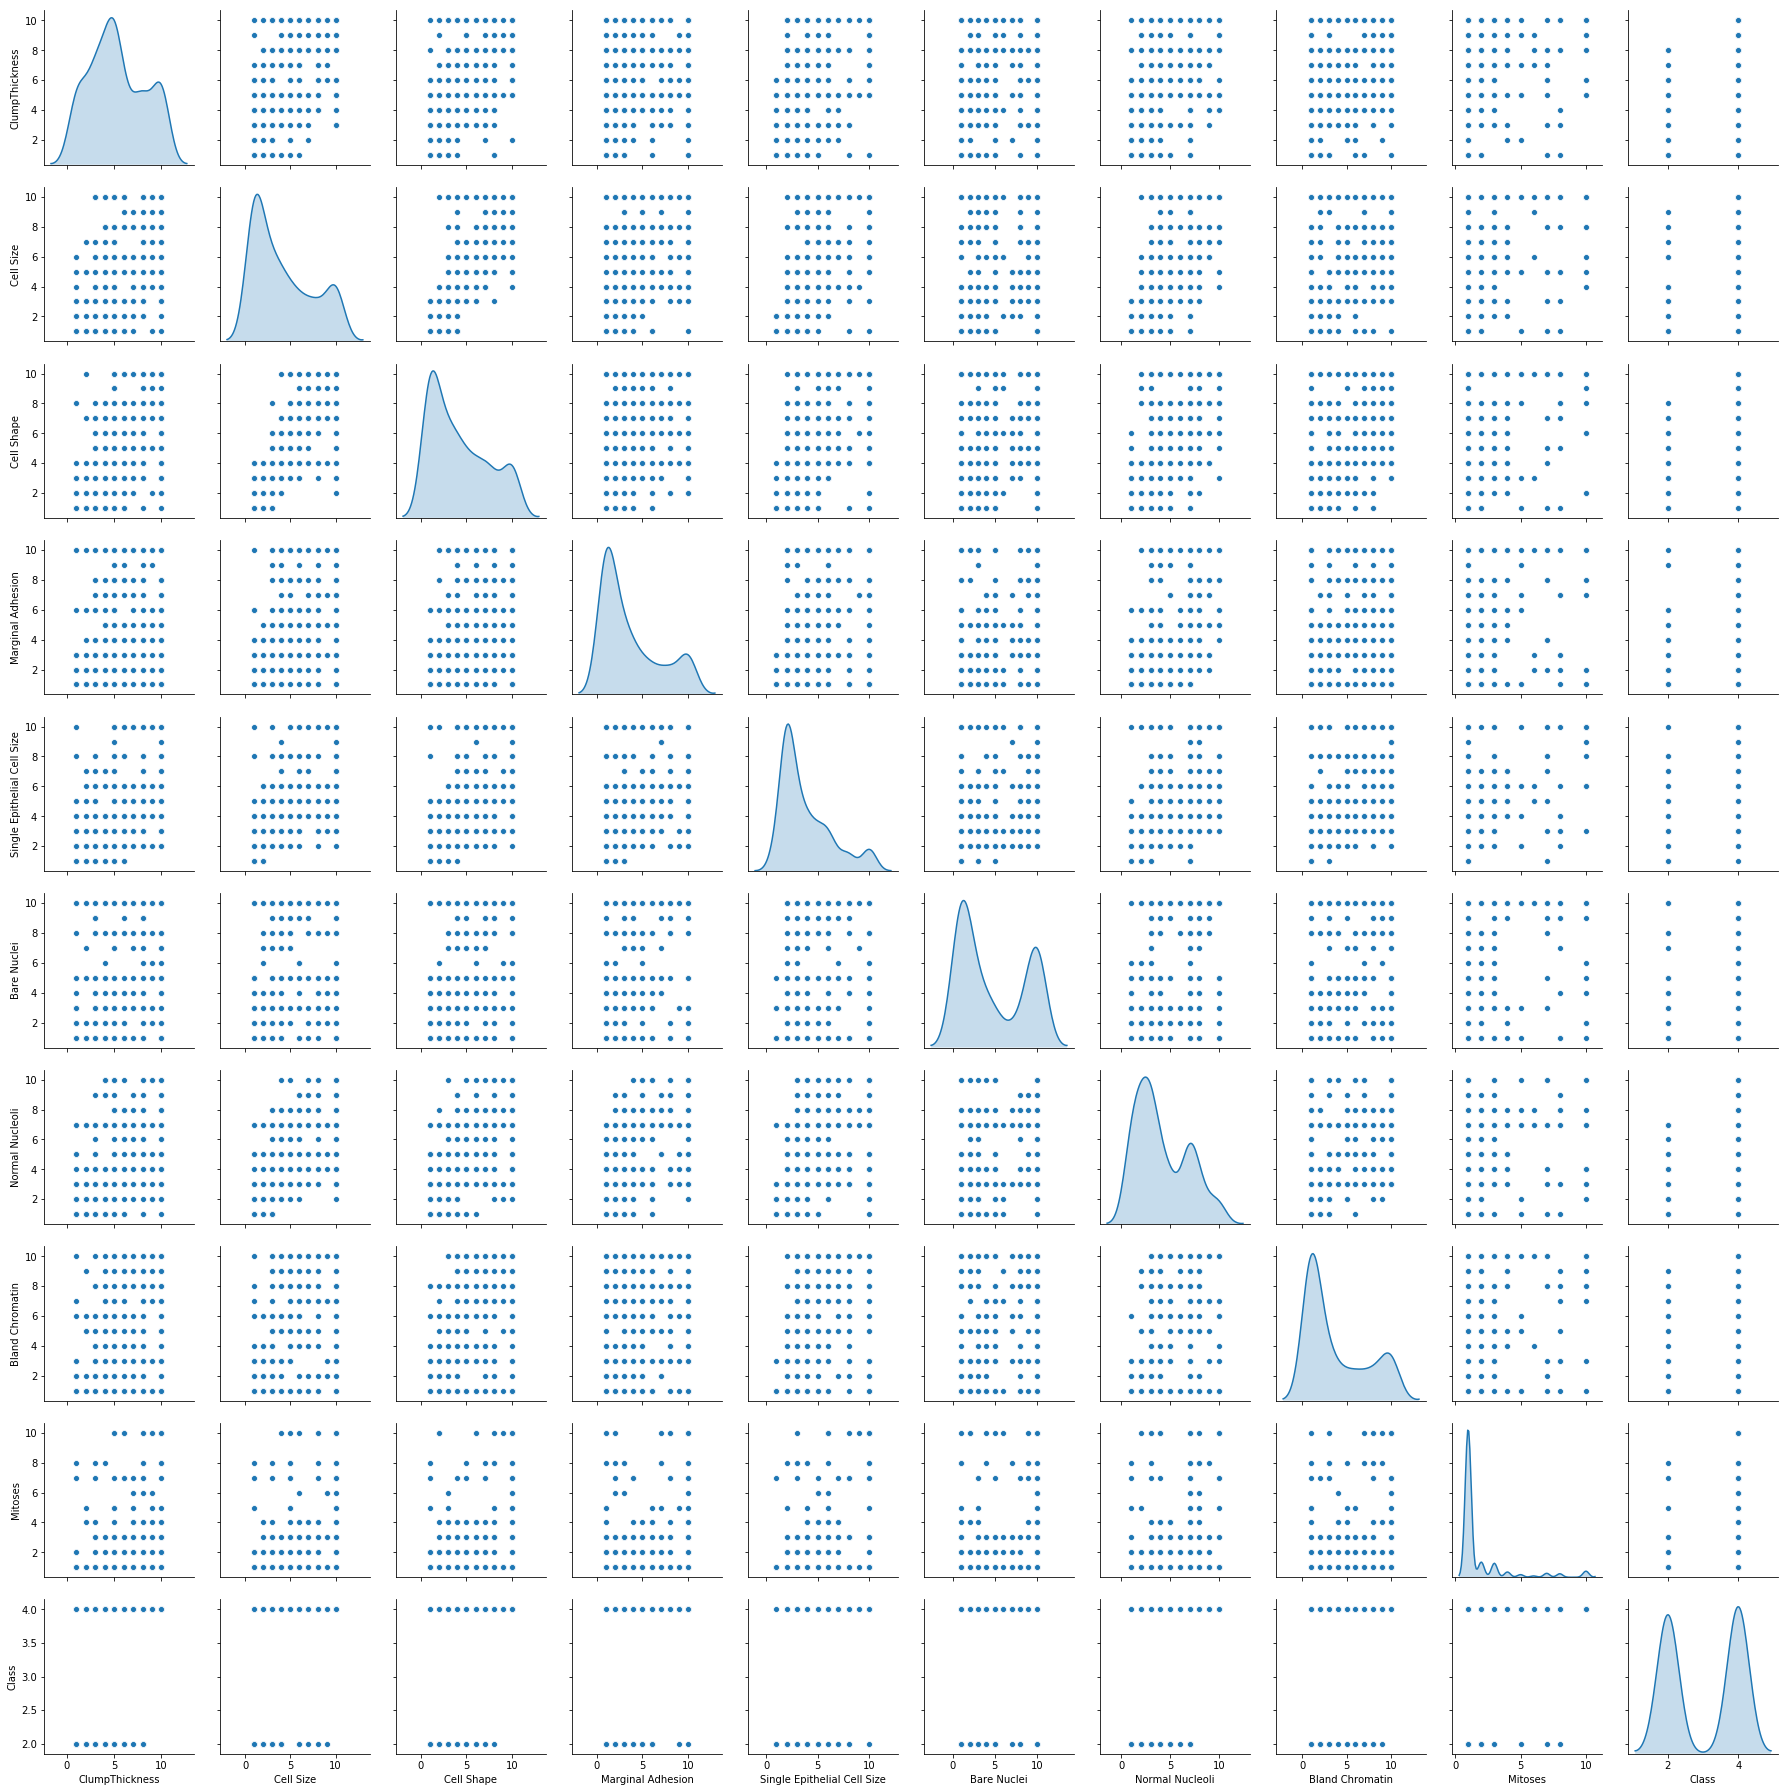

In [236]:
sns.pairplot(bc1, diag_kind='kde')
plt.show()

In [237]:
# Relationship between variables shows some correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10
## cell size , shape seem to be right skewed and has clusters

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [238]:
bc1.describe().T

count      mean       std  min  25%  50%   75%  \
ClumpThickness               463.0  5.323974  2.873752  1.0  3.0  5.0   8.0   
Cell Size                    463.0  4.174946  3.239645  1.0  1.0  3.0   7.0   
Cell Shape                   463.0  4.239741  3.121767  1.0  1.0  3.0   7.0   
Marginal Adhesion            463.0  3.691145  3.152280  1.0  1.0  2.0   6.0   
Single Epithelial Cell Size  463.0  3.840173  2.446914  1.0  2.0  3.0   5.0   
Bare Nuclei                  463.0  4.751620  3.833786  1.0  1.0  3.0  10.0   
Normal Nucleoli              463.0  4.170626  2.639002  1.0  2.0  3.0   7.0   
Bland Chromatin              463.0  3.803456  3.385452  1.0  1.0  2.0   7.0   
Mitoses                      463.0  1.885529  2.043326  1.0  1.0  1.0   2.0   
Class                        463.0  3.028078  1.000687  2.0  2.0  4.0   4.0   

                              max  
ClumpThickness               10.0  
Cell Size                    10.0  
Cell Shape                   10.0  
Marginal Adhesion            10.0  
Single Epithelial Cell Size  10.0  
Bare Nuclei                  10.0  
Normal Nucleoli              10.0  
Bland Chromatin              10.0  
Mitoses                      10.0  
Class                         4.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CC113ABA58>,
      dtype=object)

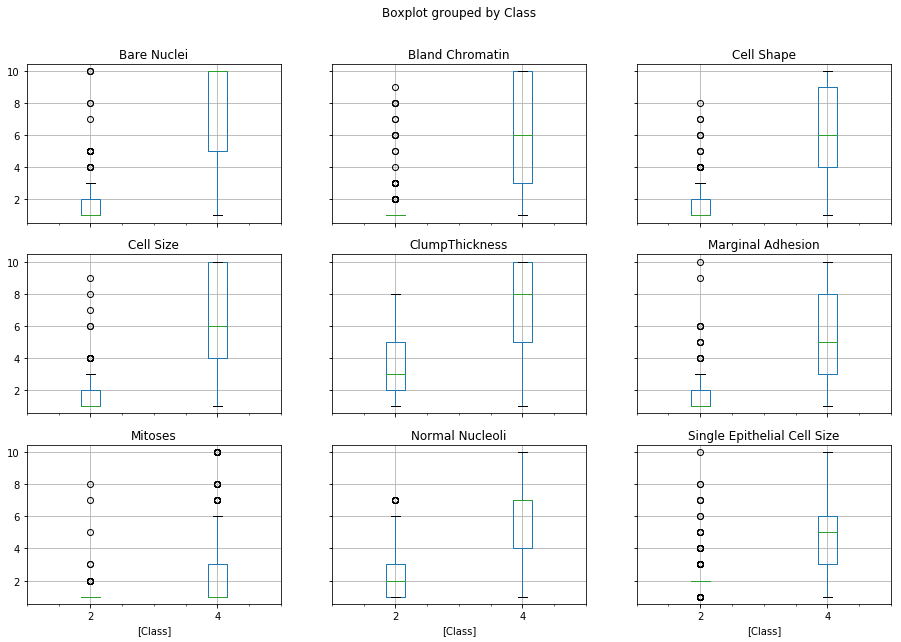

In [239]:
bc1.boxplot(by="Class",layout=(3,3), figsize=(15, 10))

In [240]:
data = bc1   # lazy to type long names. Renaming it to data. Remember data is not a copy of the dataframe
       
def replace(cls):
    median, std = cls.median(), cls.std()  #Get the median and the standard deviation of every group 
    outliers = (cls - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    cls[outliers] = cls.median() # replacing group outliers with group median      
    return cls

data_corrected = (data.groupby('Class').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(bc1['Class']))

C:\Users\maheshs\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CC16DF7080>,
      dtype=object)

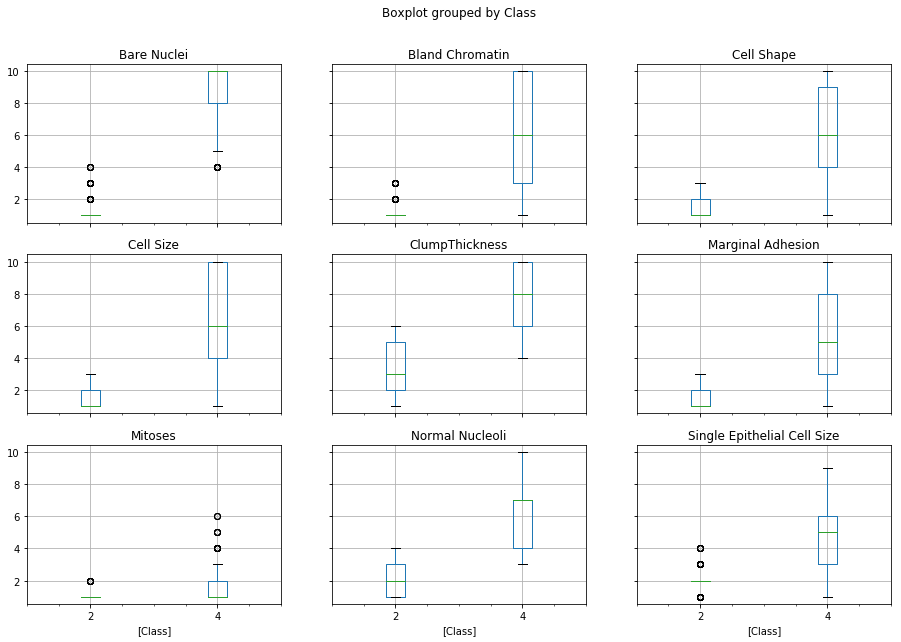

In [241]:
concat_data.boxplot(by="Class",layout=(3,3), figsize=(15, 10))

In [242]:
# We could see most of the outliers are now removed.

In [243]:
from scipy.stats import zscore

concat_data = concat_data.apply(zscore)

array = concat_data.values

# Q6 Create a covariance matrix for identifying Principal components

In [244]:
# PCA
# Step 1 - Create covariance matrix


In [245]:
pc=concat_data.copy()

In [246]:
pc.drop("Class",axis=1,inplace=True)

In [247]:
pc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 0 to 698
Data columns (total 9 columns):
ClumpThickness                 463 non-null float64
Cell Size                      463 non-null float64
Cell Shape                     463 non-null float64
Marginal Adhesion              463 non-null float64
Single Epithelial Cell Size    463 non-null float64
Bare Nuclei                    463 non-null float64
Normal Nucleoli                463 non-null float64
Bland Chromatin                463 non-null float64
Mitoses                        463 non-null float64
dtypes: float64(9)
memory usage: 36.2 KB


In [248]:
cov_matrix=pc.cov()
cov_matrix

ClumpThickness  Cell Size  Cell Shape  \
ClumpThickness                     1.002165   0.629182    0.648274   
Cell Size                          0.629182   1.002165    0.888451   
Cell Shape                         0.648274   0.888451    1.002165   
Marginal Adhesion                  0.478693   0.676373    0.657985   
Single Epithelial Cell Size        0.550704   0.731041    0.709068   
Bare Nuclei                        0.707275   0.734000    0.755510   
Normal Nucleoli                    0.608772   0.742349    0.740149   
Bland Chromatin                    0.519757   0.682749    0.692726   
Mitoses                            0.295751   0.322464    0.288454   

                             Marginal Adhesion  Single Epithelial Cell Size  \
ClumpThickness                        0.478693                     0.550704   
Cell Size                             0.676373                     0.731041   
Cell Shape                            0.657985                     0.709068   
Marginal Adhesion                     1.002165                     0.590525   
Single Epithelial Cell Size           0.590525                     1.002165   
Bare Nuclei                           0.680638                     0.676314   
Normal Nucleoli                       0.640039                     0.630025   
Bland Chromatin                       0.553716                     0.645781   
Mitoses                               0.298077                     0.336131   

                             Bare Nuclei  Normal Nucleoli  Bland Chromatin  \
ClumpThickness                  0.707275         0.608772         0.519757   
Cell Size                       0.734000         0.742349         0.682749   
Cell Shape                      0.755510         0.740149         0.692726   
Marginal Adhesion               0.680638         0.640039         0.553716   
Single Epithelial Cell Size     0.676314         0.630025         0.645781   
Bare Nuclei                     1.002165         0.747634         0.623351   
Normal Nucleoli                 0.747634         1.002165         0.644136   
Bland Chromatin                 0.623351         0.644136         1.002165   
Mitoses                         0.367812         0.272946         0.309652   

                              Mitoses  
ClumpThickness               0.295751  
Cell Size                    0.322464  
Cell Shape                   0.288454  
Marginal Adhesion            0.298077  
Single Epithelial Cell Size  0.336131  
Bare Nuclei                  0.367812  
Normal Nucleoli              0.272946  
Bland Chromatin              0.309652  
Mitoses                      1.002165

# Q7 Identify eigen values and eigen vector

In [272]:
# Step 2- Get eigen values and eigen vector

In [273]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [274]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.3146141  -0.01549882  0.80759594 -0.00319572 -0.33484074  0.05816333
  -0.25025177  0.26526415 -0.00800193]
 [-0.37521841 -0.10446331 -0.10536939  0.70037472 -0.04861003  0.0683845
  -0.28089565 -0.46931522 -0.20117802]
 [-0.37466598 -0.14825636 -0.03694025 -0.69215901  0.16858606  0.09313569
  -0.31164858 -0.45440719 -0.12841546]
 [-0.32362083 -0.04499588 -0.36314617 -0.0511271  -0.21533863 -0.71836595
  -0.27877779  0.3423515   0.03760101]
 [-0.34102346  0.00174709 -0.2213425  -0.06769475 -0.14186486  0.30132393
   0.36805966  0.3502979  -0.67898938]
 [-0.36585763  0.00375564  0.23630326  0.13167372  0.80931007 -0.22732924
   0.24722332  0.15424447  0.03721275]
 [-0.35282024 -0.14294501  0.03679483 -0.05053943 -0.36071094 -0.13210582
   0.6724846  -0.31972176  0.38620544]
 [-0.32914451 -0.03496571 -0.31067858  0.04202918  0.05592614  0.55424847
  -0.18652228  0.34433477  0.57312962]
 [-0.17932381  0.97116919 -0.02719545 -0.03906073 -0.04876695 -0.00993366
  -0.

# Q8 Find variance and cumulative variance by each eigen vector

In [275]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [276]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 64.65333295  74.13966481  80.22663578  85.50422156  89.57170584
  93.16932342  96.45751143  98.79543648 100.        ]


In [277]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 64.65333295  74.13966481  80.22663578  85.50422156  89.57170584
  93.16932342  96.45751143  98.79543648 100.        ]


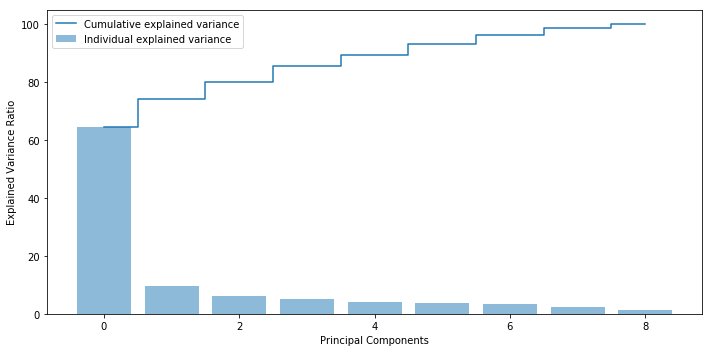

In [278]:
plt.figure(figsize=(10,5))
plt.bar(range(9), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(9), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [279]:
from sklearn.decomposition import PCA

In [280]:
X_reduced = PCA(n_components=7).fit_transform(pc)

In [281]:
X_reduced.shape

(463, 7)

In [282]:
pc1=pd.DataFrame(X_reduced)

In [283]:
pc1

0         1         2         3         4         5         6
0   -2.159996 -0.031606  0.447548 -0.054227 -0.131078  0.048424  0.138153
1   -2.062265 -0.041988  0.355300 -0.218796 -0.301254  0.150666  0.082770
2   -2.289946 -0.019809 -0.060127  0.042864 -0.145907 -0.099345  0.374847
3   -1.590913 -0.033290  0.784944 -0.070830  0.216218  0.448033  0.435878
4   -2.064783 -0.054745 -0.066158  0.422331 -0.157760  0.172831  0.048853
5    4.123998 -1.229684 -0.455143  0.022529  0.591801 -0.301877  0.353048
6   -2.601151 -0.009873 -0.684872  0.027331 -0.142299 -0.323532  0.489059
7   -2.372974 -0.061955 -0.413390 -0.022364 -0.099088 -0.373522  0.303272
8   -2.757988  0.092920 -0.429625 -0.093078  0.152908  0.011523 -0.107816
9   -2.288859 -0.004073  0.118222 -0.104804  0.073970 -0.067358 -0.114778
10  -2.788062 -0.010831 -0.563557  0.192482 -0.514444 -0.515526  0.287330
11  -2.624425  0.038807 -0.415696 -0.043068  0.006707 -0.109510  0.146758
12  -0.246331 -0.294390  0.393122  0.364531 -0.690530  0.221776  0.232431
13  -2.419896 -0.008012 -0.567801  0.139956 -0.160735 -0.247115  0.611540
14   3.186132  2.618412 -0.553229  0.794750  0.982586  0.840872 -0.058012
15   1.195565 -0.477291  0.383858 -0.053074  1.144771  0.609423  0.450499
16  -2.403848  0.027940  0.150514 -0.083847  0.012318  0.076468 -0.028694
17  -2.270285 -0.026173  0.164443 -0.033837 -0.133883 -0.044565  0.225880
18   1.829302  0.457694  1.290293  0.920483  0.906494 -0.211297 -0.643313
19  -2.049707 -0.037039  0.730653 -0.074616 -0.128273  0.141413  0.050427
20   1.881295  2.901244 -0.278884  1.538070  0.028618  1.304105  0.381394
21   2.233702 -0.702474  0.548249 -1.504875 -0.415809  1.016809  0.480130
22  -2.514137  0.033373 -0.132591 -0.063458  0.009512 -0.016521  0.059032
23   0.532758 -0.559385  1.551535  0.082226 -0.784199 -0.611778  0.683179
24  -2.601151 -0.009873 -0.684872  0.027331 -0.142299 -0.323532  0.489059
25  -0.468554 -0.246105 -0.063918  0.065486 -0.930618  0.685191 -0.319061
26  -2.586058  0.000402 -0.043567  0.080737 -0.300980 -0.352341 -0.228780
27  -2.293559  0.022507  0.433619 -0.104236  0.015123  0.169457 -0.116421
28  -2.632499  0.005055 -0.735976 -0.131299  0.230915 -0.367424 -0.216210
29  -2.701047  0.032416 -0.011276  0.101694 -0.362633 -0.208515 -0.142697
..        ...       ...       ...       ...       ...       ...       ...
433 -2.647699  0.087486 -0.146520 -0.113467  0.155713  0.104512 -0.195542
434  4.825255  1.021535 -0.178692 -0.351455 -0.269018  0.190421  0.550992
435 -1.992729 -0.031716 -0.053843  0.407677  0.040875  0.188247 -0.230563
436 -2.331909  0.053480 -0.094016  0.322312  0.134642  0.414898 -0.460295
437 -2.662775  0.069780 -0.943331  0.383480  0.126226  0.135931 -0.197116
438  4.051567 -1.329132 -1.555244  0.426469 -0.841512 -0.561745  0.124168
439 -2.086154  0.076949 -0.207529  0.118403  0.488266  0.519830  0.101395
440 -2.414223 -0.016347 -0.961693  0.412532  0.041678 -0.128929 -0.028625
441 -2.159996 -0.031606  0.447548 -0.054227 -0.131078  0.048424  0.138153
442  2.349369  1.311065  0.321711  1.321373 -0.036966 -1.275378 -0.150784
443 -2.498937 -0.049058 -0.722047 -0.081289  0.084714 -0.488457  0.038364
444 -2.308635  0.004801 -0.363192  0.392711 -0.014365  0.200876 -0.117994
445 -1.887698  1.087370  0.229568  0.034865  0.207203 -0.041771 -0.648256
446  2.268320  1.546075 -0.575840 -1.680190 -0.439193 -0.003889  1.196196
447  2.992237 -1.142872 -1.659107 -0.461291 -0.332941 -0.607084 -0.768731
448  2.654936 -0.954141 -0.045828  0.721813  0.547658 -0.398001 -0.221710
449 -2.162833 -0.067040 -0.266254  0.193679 -0.086974 -0.172682  0.139010
450 -1.892344 -0.033099  0.222168 -0.390617  0.697181  0.051853 -0.439493
451 -2.537411  0.082053  0.136585 -0.133857  0.158519  0.197502 -0.283269
452  4.603011 -1.356298 -0.139719  0.324523 -0.827486 -0.096800 -0.314464
453  3.213509  1.189402 -1.196395  1.022430  0.109570 -0.865848 -1.138109
454 -2.062265 -0.041988  0.355300 -0.218796 -0.301254  0.150666  0.082770
455 -2.318675  0

In [284]:
new_df=pd.concat([pc1,pc],axis =1)

In [285]:
new_df.shape

(581, 16)

# Q10 Find correlation between components and features

In [286]:
new_df1=new_df.corr()

In [287]:
new_df1.iloc[:7,7:]

ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0        0.032404   0.036881    0.084870           0.011879   
1        0.067770   0.022114    0.004190           0.037919   
2        0.023812   0.041692    0.011616          -0.006719   
3        0.029855  -0.000710   -0.009048           0.019024   
4        0.054564  -0.055956   -0.016391           0.016461   
5        0.136905   0.039233    0.059624           0.025283   
6       -0.015622  -0.037356   -0.087468          -0.094199   

   Single Epithelial Cell Size  Bare Nuclei  Normal Nucleoli  Bland Chromatin  \
0                     0.003006     0.032541        -0.013923         0.055140   
1                     0.057508     0.009576         0.025205         0.015430   
2                    -0.021205    -0.033888        -0.015002         0.042786   
3                    -0.016365     0.008578         0.008022         0.019003   
4                     0.006062    -0.013631         0.017508        -0.003065   
5                     0.041369     0.093598         0.046827         0.082821   
6                    -0.064384    -0.042354        -0.071922        -0.118713   

    Mitoses  
0  0.053073  
1  0.018026  
2  0.063282  
3  0.110486  
4  0.018697  
5  0.089597  
6 -0.000655

In [288]:
## insights :: corealtion between column 0 is high  

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [295]:
jk=pd.read_csv("jokes.csv")

# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [296]:
ratings =jk.iloc[:,1:].head(200)

In [297]:
ratings.head(2)

Joke1  Joke2  Joke3  Joke4  Joke5  Joke6  Joke7  Joke8  Joke9  Joke10  ...  \
0  -7.82   8.79  -9.66  -8.16  -7.52  -8.50  -9.85   4.17  -8.98   -4.76  ...   
1   4.08  -0.29   6.36   4.37  -2.38  -9.66  -0.73  -5.34   8.88    9.22  ...   

   Joke91  Joke92  Joke93  Joke94  Joke95  Joke96  Joke97  Joke98  Joke99  \
0    2.82   99.00   99.00   99.00   99.00   99.00   -5.63   99.00   99.00   
1    2.82   -4.95   -0.29    7.86   -0.19   -2.14    3.06    0.34   -4.32   

   Joke100  
0    99.00  
1     1.07  

[2 rows x 100 columns]

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [298]:
ratings.replace(99.00,0,inplace=True)

### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [299]:
ratings_diff=ratings.mean()

In [300]:
ratings_diff.sort_values(ascending=False).head(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64